# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


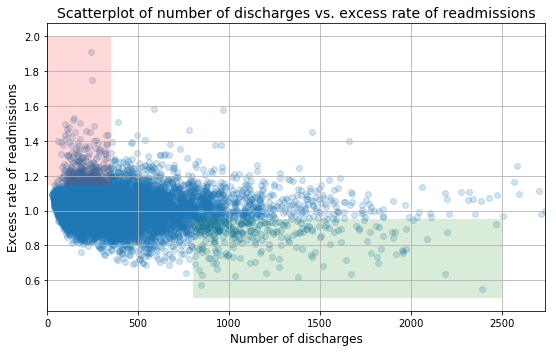

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [9]:
# Check if the statistic above is correct.
df1  = pd.DataFrame({'NOD':clean_hospital_read_df['Number of Discharges'],'ERR':clean_hospital_read_df['Excess Readmission Ratio']}).dropna()

#Check the two means
below100 = df1[df1.NOD<100]['ERR']
above1000 = df1[df1.NOD>1000]['ERR']
print(np.mean(below100),np.mean(above1000))

#Check the two percentages
perc100 = np.sum(below100>1)/len(below100)
perc1000= np.sum(above1000>1)/len(above1000)
print(perc100,perc1000)

1.0226183501683506 0.9783354211663071
0.632154882155 0.444924406048


In [12]:
# Perform a two sample t test to see if the difference between the two means has statistical significance
std100 = np.std(below100)
std1000 = np.std(above1000)
print(len(below100),len(above1000))
print(std100,std1000)

t_test = (np.mean(below100)-np.mean(above1000))/np.sqrt((std100**2/len(below100))+(std1000**2/len(above1000)))
print('t test statistic:', t_test)

1188 463
0.05795419632801004 0.11987768585552241
t test statistic: 7.60954591234


The Z value at 99.9% level is 3.291, which is smaller than 7.61, meaning that the difference between the two means is statistically significant.

Having confirmed the statistics, the next step is to find out and test the correlation coefficient between the discharge number and the excess rate of readmissions.

In [13]:
# define a function to calculate the pearson corelation coefficient
def pear_r(x,y):
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]
r_obs = pear_r(df1.NOD, df1.ERR)

# Null Hypothesis: H0:r=0,H1:r!=0 
# Calculate the corelation coefficient of permutated discharge numbers and fixed excess readmission rate for 10000 times
perm_replicates = np.empty(10000)
for i in range(10000):
    NOD_perm = np.random.permutation(df1.NOD)
    perm_replicates[i] = pear_r(NOD_perm, df1.ERR)
    
#Calculate the probability that the replicated r is at least as exstreme as the observed r: p   
p = np.sum(perm_replicates<= r_obs)/len(perm_replicates)
print('Corelation Coefficient:', r_obs)
print('p-val =', p)


Corelation Coefficient: -0.0973979435108
p-val = 0.0


p=0 means that the probability is so small that the Null hypothesis can be rejected at the 99% significance level(α=.01). 

> Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

The statistical significance means that there is a undeniable correlation between hospital discharge numbers(NOD) and excess readmission rate(ERR). But the correlation coefficient is quite small, -0.098 means that the practial effect of NOD on ERR is very week, as it is shown in the plot below, avergely, a 2000 increase in the NOD only brings down the ERR by approximatly 0.05.

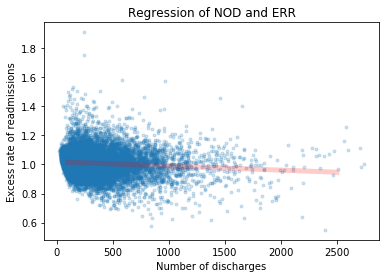

In [17]:
plt.plot( df1.NOD[:-3], df1.ERR[:-3],marker='.', linestyle='none',alpha = 0.2)
slope, incpt = np.polyfit(df1.NOD[:-3], df1.ERR[:-3],1)
X = np.array([100,2500])
plt.plot(X, slope*X + incpt,linewidth=5, alpha=0.2, color='red')
plt.xlabel('Number of discharges')
plt.ylabel('Excess rate of readmissions')
plt.title('Regression of NOD and ERR')
plt.show()

The given scatterplot showes the relation between two variables by emplifing the two extreme areas, but with a regression line, the relation is more clearly indicated.

Conclusion: The relation between hospital capacity (number of discharges) and readmission rates is statistically significant, but not practically significant. Yet the smaller hospitals do have slightly more flutuant readmission rates. Communication between hospitals with similar capacities might be able to help improve the readmission rates.